# Multi Layer LSTM

We will train the following number of cells for a Three-Layer LSTM: 

In [1]:
import torch 
from torch import nn 
import numpy as np
import argparse
from Dataset import FairytalesDataset
from torch import nn, optim
from torch.utils.data import DataLoader
from train import save_checkpoint, load_checkpoint, train
from models import Lstm_model
from test import predict 
import time

In [2]:
DIR_PATH = "data/fairytales.txt"
START_TOKEN = "<s>"
END_TOKEN = "</s>"

parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=0)
parser.add_argument('--batch-size', type=int, default=256)
parser.add_argument('--sequence_length', type=int, default=7)
args, unknown = parser.parse_known_args()

dataset = FairytalesDataset(DIR_PATH, START_TOKEN, END_TOKEN, args)
print(dataset.__getitem__(3))
print('Vocab:', len(dataset.unique_words))

(tensor([ 53,   9,  73,   6,  19, 149,  40]), tensor([  9,  73,   6,  19, 149,  40,  93]))
Vocab: 3028


## 1. 128 cells

In [3]:
model = Lstm_model(dataset, lstm_size = 128, num_layers = 3)

In [4]:
start_time = time.time()

loss_hist = train(dataset, model, args, ckpt_filename='multi_layer_lstm/128.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.03902482986450195


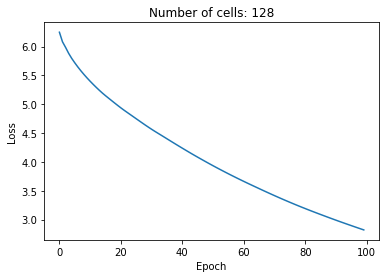

In [5]:
import matplotlib.pyplot as plt

exp = torch.load('multi_layer_lstm/128.tar')
loss_history = exp["loss_history"]

plt.plot(range(len(loss_history)), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 128")
plt.show()

In [6]:
text,sent_perplexity = predict(dataset, model, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about paint as by on a boats which open and but paperarello climbed up in shore </s> <s> paperarello held anything away with him </s> <s> however else love they as paperarello who had been no old cut in their fashion but by a thought </s> <s> the meal is the secret of this years of here </s> <s> he listened </s> <s> then the king directions here his princess standing and but it came to a great palace to look on his suit and he ran off </s> <s> evening at the bottom to the royal first should his horse </s>
 
Number of sentences: 7
 
Perplexity per sentence: [2.834132168142611, 1.1966362221651183, 2.4642008302313103, 2.0666287745765146, 1.5723899361727245, 1.7936032865231635, 2.284084840362747]
 
Average sentence perplexity: 2.030239436882027


## 2. 256 cells

In [7]:
model2 = Lstm_model(dataset, lstm_size = 256, num_layers = 3)

In [8]:
start_time = time.time()

loss_hist = train(dataset, model2, args, ckpt_filename='multi_layer_lstm/256.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.07657432556152344


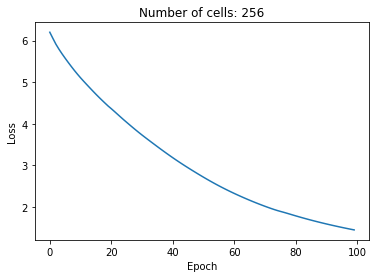

In [9]:
import matplotlib.pyplot as plt

exp2 = torch.load('multi_layer_lstm/256.tar')
loss_history2 = exp2["loss_history"]

plt.plot(range(len(loss_history2)), loss_history2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 256")
plt.show()

In [10]:
text,sent_perplexity = predict(dataset, model2, text='this is a story about', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> this is a story about sprang almost running which we can stoop more amusing </s> <s> when the enemy did not no good maiden he returned of some place whom she could be sitting which far before alone at once in a tall house </s> <s> i thought what are yours and only only just tiidu makes that home </s> <s> the maiden nor no hole in the third moment he talked out him on its chase and servants with the help of the men calling to eat with his cramped beside over it and in the sound of the lake where the knight was </s>
 
Number of sentences: 4
 
Perplexity per sentence: [1.307819341958626, 1.5953296198732052, 1.2225491086485352, 1.3104423249021888]
 
Average sentence perplexity: 1.3590350988456388


## 3. 512 cells 

In [3]:
model3 = Lstm_model(dataset, lstm_size = 512, num_layers = 3)

In [4]:
start_time = time.time()

train(dataset, model3, args, ckpt_filename='multi_layer_lstm/512.tar',
      load_model=True, save_epochs=2)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

-> Loading checkpoint
Elapsed time:  0.17913198471069336


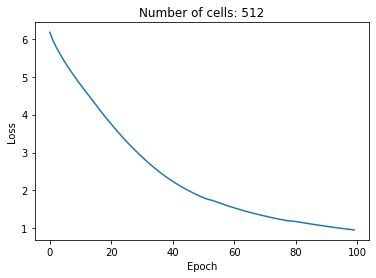

In [5]:
import matplotlib.pyplot as plt

exp3 = torch.load('multi_layer_lstm/512.tar')
loss_history3 = exp3["loss_history"]

plt.plot(range(len(loss_history3)), loss_history3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Number of cells: 512")
plt.show()

In [19]:
text,sent_perplexity = predict(dataset, model3, text='once upon a time', next_words=100)

print('Generated text:')
print(' ')
print(text)
print(' ')
print('Number of sentences:', len(sent_perplexity))
print(' ')
print('Perplexity per sentence:', sent_perplexity)
print(' ')
print('Average sentence perplexity:', sum(sent_perplexity) / len(sent_perplexity))

Generated text:
 
<s> once upon a time stood without welcome the castle </s> <s> then he felt it would be foolish to go any further and he turned to find his way home </s> <s> he thought it would be easy enough to follow the path along which he had come but somehow it was always branching off in unexpected directions </s> <s> he looked about for a house where he might stop and ask his way but there was not a sign of one anywhere and he was afraid to stand still for it was cold and there were many stories of wolves over this strange </s>
 
Number of sentences: 4
 
Perplexity per sentence: [1.9388173251557141, 0.18674698194998668, 0.0024786042883794715, 0.29016245255073075]
 
Average sentence perplexity: 0.6045513409862027
